In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt
%matplotlib inline

### Get files for edge data and set x and y cols

In [52]:
DATA_DIR = 'sample_csv'
file_names = os.listdir('./%s' % DATA_DIR)

FEAT_TRANSFORM = {
    'Points:0': 'x',
    'Points:1': 'y'
}
FEATURES = FEAT_TRANSFORM.values()

In [ ]:
def load_edge(file_name):
    image_path = '%s/%s' % (DATA_DIR, file_name)
    return pd.read_csv(image_path)[list(FEAT_TRANSFORM.keys())].rename(columns=FEAT_TRANSFORM)

def frame_to_row(in_frame):
    cols = get_cols_from_frame(in_frame)
    unstacked = in_frame.unstack()
    return pd.Series(unstacked.ravel(), index=cols)

def get_cols_from_frame(in_frame):
    unstacked = in_frame.unstack()
    return list('y' + unstacked['y'].index.astype(str)) + list('x' + unstacked['x'].index.astype(str))

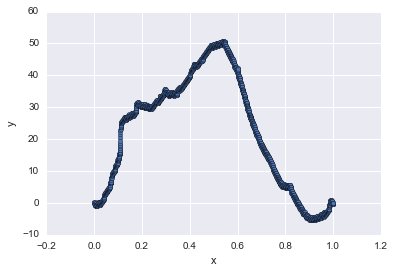

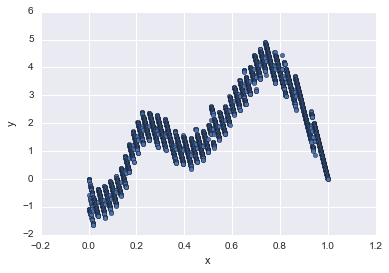

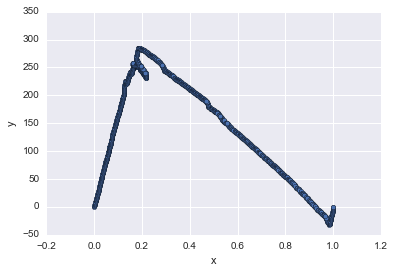

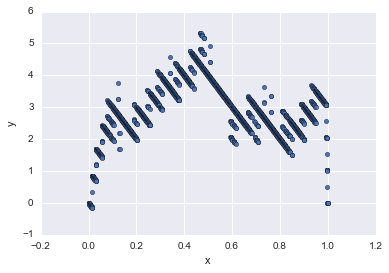

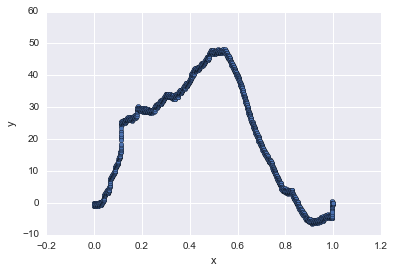

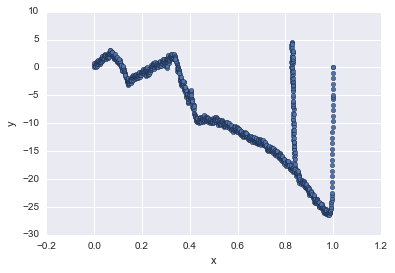

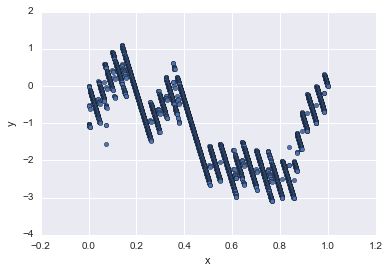

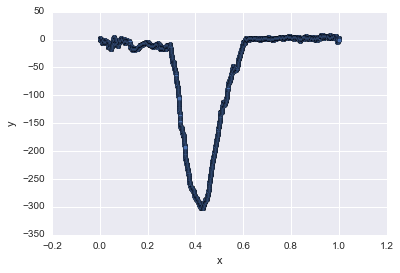

In [69]:
edges = []
for file_name in file_names:
    edge = axis_align_pandas(load_edge(file_name).sort_values(by='x'))
    edges.append(edge)
    edge.plot(kind="scatter", x='x', y='y')

In [71]:
downsampled_edges = []
for edge in edges:
    downsampled_edges.append(helpers.downsample(axis_align_pandas(edge), 1000))

total_frame_cols = get_cols_from_frame(downsampled_edges[0])
total_frame = pd.DataFrame(columns=total_frame_cols)

for edge in downsampled_edges:
    total_frame = total_frame.append(frame_to_row(edge), ignore_index=True)
    
# fr.append(pd.Series(unstacked.ravel(), index=cols), ignore_index=True)

In [75]:
total_frame

,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,x990,x991,x992,x993,x994,x995,x996,x997,x998,x999
0,0.000093,0.000833,0.001620,0.002229,0.003061,0.003894,0.004726,0.005559,0.006391,0.007224,...,5.932936,6.022063,5.939646,5.171050,5.260177,5.349304,5.438432,5.527559,5.616686,5.705814
1,0.000093,0.000833,0.001620,0.002219,0.003053,0.003886,0.004673,0.005231,0.005830,0.006663,...,3.922603,3.894271,3.865939,3.837607,3.809275,3.780942,3.752610,3.724278,3.695946,3.667614
2,0.000000,0.000426,0.000852,0.001278,0.001704,0.002130,0.002753,0.003375,0.003801,0.004227,...,197.312960,195.679512,195.892290,195.430734,194.969177,194.507621,194.046065,179.737823,179.276267,178.814711
3,0.000094,0.000850,0.001700,0.002550,0.003399,0.004249,0.005099,0.005949,0.006799,0.007649,...,2.033986,2.025488,2.016989,2.008491,1.999992,1.991493,1.982995,1.974496,1.965998,1.957499
4,0.000098,0.000645,0.001479,0.002361,0.003242,0.004123,0.005004,0.005885,0.006766,0.007647,...,3.760948,3.872048,3.119525,3.687077,3.094934,3.206035,3.317135,3.428235,3.539335,3.650435
5,0.000000,0.000655,0.002429,0.005785,0.001310,0.003547,0.004666,0.006440,0.007095,0.008213,...,-23.641360,-23.978437,-24.146975,-9.412622,-23.906936,-9.244083,-23.498357,-23.666896,-23.835435,-24.003973
6,0.000156,0.000874,0.001687,0.002374,0.003374,0.004374,0.005218,0.006125,0.007125,0.008125,...,-0.194122,-0.215122,-0.236122,-0.257121,-0.278121,-0.299121,-0.320121,-0.341120,-0.362120,-0.383120
7,0.000226,0.001079,0.002078,0.003252,0.004325,0.005273,0.006199,0.007071,0.008169,0.009116,...,4.068935,3.330265,2.604195,3.568155,2.834885,1.899823,3.771847,6.249247,7.717687,6.780825


In [73]:
from sklearn.metrics.pairwise import euclidean_distances
pd.DataFrame(euclidean_distances(total_frame))

,0,1,2,3,4,5,6,7
0,0.000000,977.757448,5772.530734,931.634122,72.293089,1290.457216,1067.255400,4349.997520
1,977.757448,0.000000,6691.413825,67.342853,930.036781,415.232497,114.481358,3629.567595
2,5772.530734,6691.413825,0.000000,6655.559477,5832.298855,7038.185950,6793.895278,9434.955720
3,931.634122,67.342853,6655.559477,0.000000,881.850022,426.290842,141.125638,3674.713556
4,72.293089,930.036781,5832.298855,881.850022,0.000000,1232.924607,1016.276585,4327.852035
5,1290.457216,415.232497,7038.185950,426.290842,1232.924607,0.000000,309.170265,3506.696458
6,1067.255400,114.481358,6793.895278,141.125638,1016.276585,309.170265,0.000000,3584.780038
7,4349.997520,3629.567595,9434.955720,3674.713556,4327.852035,3506.696458,3584.780038,0.000000


In [78]:
axis_align_pandas(edges[0])

,x,y
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000278,0.029709
3,0.000555,0.059418
4,0.000833,0.089127
5,0.001110,0.118836
6,0.001388,0.148546
7,0.001665,0.178255
8,0.001808,-0.306670
9,0.001951,-0.791595


In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(5)
kmeans.fit(total_frame)
kmeans.predict(total_frame)

array([0, 3, 1, 3, 0, 4, 3, 2], dtype=int32)